In [18]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.stats import gaussian_kde
import glob

In [19]:
period = 5
dealias = 2 / 3
eta = 0.01

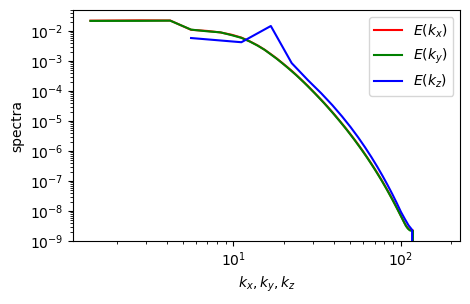

In [25]:
file_path = 'spectra1d.h5'

diss_length = dealias * np.pi / (2 * eta)

with h5py.File(file_path, 'r') as hdf_file:
    kx = dealias * hdf_file['kx'][:]
    ky = dealias * hdf_file['ky'][:]
    kz = dealias * hdf_file['kz'][:]
    spectra_E_kx = hdf_file['spectra_E_kx'][:]
    spectra_E_ky = hdf_file['spectra_E_ky'][:]
    spectra_E_kz = hdf_file['spectra_E_kz'][:]
    times = hdf_file['times'][:]
    
filtered_spectra_E_kx = spectra_E_kx[times > period]
filtered_spectra_E_ky = spectra_E_ky[times > period]
filtered_spectra_E_kz = spectra_E_kz[times > period]

spectra_E_kx_mean = np.mean(filtered_spectra_E_kx, axis=0)
spectra_E_ky_mean = np.mean(filtered_spectra_E_ky, axis=0)
spectra_E_kz_mean = np.mean(filtered_spectra_E_kz, axis=0)

plt.figure(figsize=(5, 3))

k53 = False

if k53:
    power = 5/3
else:
    power = 0

plt.loglog(kx[1:], spectra_E_kx_mean[1:] * kx[1:]**(power), 'r-', label='$E(k_x)$')
plt.loglog(ky[1:], spectra_E_ky_mean[1:] * ky[1:]**(power), 'g-', label='$E(k_y)$')
plt.loglog(kz[1:], spectra_E_kz_mean[1:] * kz[1:]**(power), 'b-', label='$E(k_z)$')

#plt.loglog(kx[1:], 10**-2 * kx[1:]**(-5/3), 'k--', label='$k^{-5/3}$')


plt.xlabel('$k_x, k_y, k_z$')
plt.ylabel('spectra')

plt.ylim(bottom=10**-9)

plt.legend()
plt.savefig('1d_spectra.png', dpi=300)

plt.show()

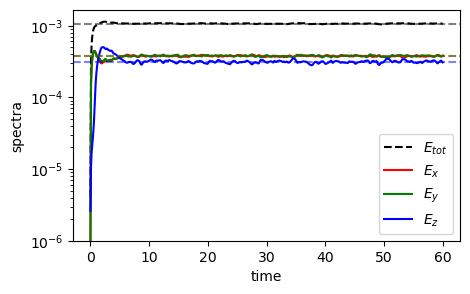

Plot saved as '3d_spectrum.png'


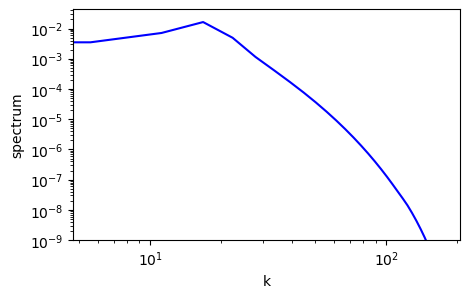

In [22]:
file_path = 'spectra3d.h5'
period = 5

with h5py.File(file_path, 'r') as hdf_file:
    k_spectra3d = dealias * hdf_file['k_spectra3d'][:]
    spectra_E = hdf_file['spectra_E'][:]
    spectra_u = hdf_file['spectra_vx'][:]
    spectra_v = hdf_file['spectra_vy'][:]
    spectra_w = hdf_file['spectra_vz'][:]
    times = hdf_file['times'][:]

spectra_E_mean = np.mean(spectra_E, axis=1)
spectra_u_mean = np.mean(spectra_u, axis=1)
spectra_v_mean = np.mean(spectra_v, axis=1)
spectra_w_mean = np.mean(spectra_w, axis=1)

E_mean = np.mean(spectra_E_mean[times > period])
u_mean = np.mean(spectra_u_mean[times > period])
v_mean = np.mean(spectra_v_mean[times > period])
w_mean = np.mean(spectra_w_mean[times > period])

E_std = np.std(spectra_E_mean[times > period])
u_std = np.std(spectra_u_mean[times > period])
v_std = np.std(spectra_v_mean[times > period])
w_std = np.std(spectra_w_mean[times > period])

plt.figure(figsize=(5, 3))
plt.semilogy(times, spectra_E_mean, 'k--', label='$E_{tot}$')
plt.semilogy(times, spectra_u_mean, 'r-', label='$E_x$')
plt.semilogy(times, spectra_v_mean, 'g-', label='$E_y$')
plt.semilogy(times, spectra_w_mean, 'b-', label='$E_z$')

plt.axhline(E_mean, color='k', alpha=0.5, linestyle='--')
plt.axhline(u_mean, color='r', alpha=0.5, linestyle='--')
plt.axhline(v_mean, color='g', alpha=0.5, linestyle='--')
plt.axhline(w_mean, color='b', alpha=0.5, linestyle='--')

plt.xlabel('time')
plt.ylabel('spectra')

plt.ylim(bottom=10**-6)

plt.legend()

plt.savefig('3d_spectra_time.png', dpi=300)

plt.show()

filtered_spectra = spectra_E[times > period]

spectra_E_mean = np.mean(filtered_spectra, axis=0)

plt.figure(figsize=(5, 3))
plt.loglog(k_spectra3d, spectra_E_mean, 'b-')

plt.xlabel('k')
plt.ylabel('spectrum')

plt.ylim(bottom=10**-9)

plt.savefig('3d_spectrum.png', dpi=300)
print("Plot saved as '3d_spectrum.png'")

state_phys_t0030.002.h5
Re:101
state_phys_t0030.004.h5
Re:450
Plot saved as 'richardson_pdf.png'


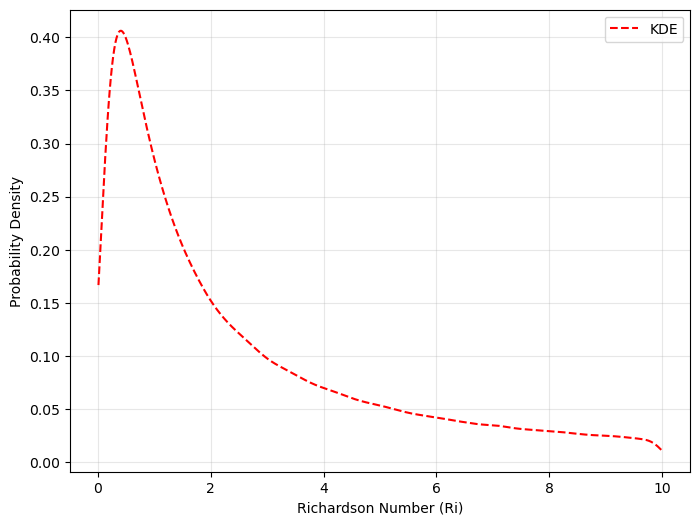

In [41]:
Lz = 0.75
nz = 64
dz = Lz / nz
N = 5
all_Ri = []

state_phys_pattern = 'state_phys*.h5'
state_phys_list = sorted(glob.glob(state_phys_pattern))

for idx, file_path in enumerate(state_phys_list):
    with h5py.File(file_path, 'r') as f:
        u = f['state_phys/vx'][:]
        v = f['state_phys/vy'][:]
        
        uh = np.sqrt(u**2 + v**2)
        duh_dz = np.gradient(uh, dz, axis=0)
        Ri = (N**2 / (duh_dz[duh_dz!=0]**2)).ravel()
        
        all_Ri.append(Ri[Ri < 10])
        Re = np.mean([np.abs(np.mean(u)) * 3 / 1e-6, np.abs(np.mean(v)) * 3 / 1e-6])
        print(file_path)
        print(f'Re:{Re:.0f}')
all_Ri_array = np.concatenate(all_Ri)

plt.figure(figsize=(8, 6))

# Compute and plot the KDE
kde = gaussian_kde(all_Ri_array)
x_vals = np.linspace(np.min(all_Ri_array), np.max(all_Ri_array), 500)
plt.plot(x_vals, kde(x_vals),'r--', label='KDE')

plt.xlabel('Richardson Number (Ri)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)

plt.savefig('richardson_pdf.png', dpi=300)
print("Plot saved as 'richardson_pdf.png'")
plt.show()

In [43]:
Lfh = 1.0
eps = 1.0
Uh = (eps * Lfh) ** (1 / 3)

for N in [5.0, 10.0]:
    print(f'N:{N} - Fh:{Uh / (N * Lfh):.1f}')

N:5.0 - Fh:0.2
N:10.0 - Fh:0.1
